# PPIxFAC (Plasmapause boundary)

> Abstract: Access to the `PPIxFAC` product from the PRISM project. This gives information about the boundaries of small-scale field-aligned currents (SSFAC) and the associated midnight plasmapause (PP) index.

See also:
- https://swarmhandbook.earth.esa.int/catalogue/SW_PPIxFAC_2F
- MIT notebook: https://notebooks.vires.services/notebooks/03j1_demo-prism-mitx
- More notebooks: https://nbviewer.org/github/pacesm/jupyter_notebooks/tree/master/PRISM/
- Project page and documentation: https://earth.esa.int/eogateway/activities/plasmapause-related-boundaries-in-the-topside-ionosphere-as-derived-from-swarm-measurements

In [1]:
%load_ext watermark
%watermark -i -v -p viresclient,pandas,xarray,matplotlib

Python implementation: CPython
Python version       : 3.11.6
IPython version      : 8.18.0

viresclient: 0.12.0
pandas     : 2.1.3
xarray     : 2023.12.0
matplotlib : 3.8.2



In [2]:
import datetime as dt
import matplotlib.pyplot as plt
from viresclient import SwarmRequest

## Collection information

The dataset is split over a default collection, and a subcollection:
- `SW_OPER_PPIxFAC_2F` contains the plasmapause index (PPI)
- `SW_OPER_PPIxFAC_2F:ID` identifies boundaries of SSSFAC (see `PointType`)

Collections available:

| Collection | Dataset |
|---|---|
|`SW_OPER_PPIAFAC_2F`| Swarm A PPI and SSFAC boundaries |
|`SW_OPER_PPIAFAC_2F:ID`| Swarm A edges of the SSFAC boundaries ("ID" dataset) |
|`SW_OPER_PPIBFAC_2F`| Swarm B PPI and SSFAC boundaries |
|`SW_OPER_PPIBFAC_2F:ID`| Swarm B edges of the SSFAC boundaries ("ID" dataset) |
|`SW_OPER_PPICFAC_2F`| Swarm C PPI and SSFAC boundaries |
|`SW_OPER_PPICFAC_2F:ID`| Swarm C edges of the SSFAC boundaries ("ID" dataset) |

Available "measurements" in each collection type:

In [3]:
request = SwarmRequest()
print("PPIxFAC variables:\n", request.available_measurements("SW_OPER_PPIAFAC_2F"))
print("PPIxFAC:ID variables:\n", request.available_measurements("SW_OPER_PPIAFAC_2F:ID"))

PPIxFAC variables:
 ['Counter', 'Latitude_QD', 'Longitude_QD', 'MLT_QD', 'L_value', 'SZA', 'Sigma', 'PPI', 'dL', 'Quality']
PPIxFAC:ID variables:
 ['Counter', 'Latitude_QD', 'Longitude_QD', 'MLT_QD', 'L_value', 'SZA', 'Position_Quality', 'PointType']


$$R_E$$

### `SW_OPER_PPIxFAC_2F`

| VirES Variable | Source Product Variable | Unit | Dimension | Description | 
|---|---|---|---|---|
| `Counter` | `Counter` | $$-$$ | vector[2] | Swarm orbit and quarter orbit counters |
| `Timestamp` | `Timestamp` | $$-$$ | scalar | UTC time of the SSFAC boundary |
| `Latitude` | `Latitude` | $$\text{deg}$$ | scalar | ITRF geocentric latitude of the SSFAC boundary |
| `Longitude` | `Longitude` | $$\text{deg}$$ | scalar | ITRF geocentric longitude of the SSFAC boundary |
| `Radius` | `Radius` | $$\text{m}$$ | scalar | ITRF geocentric radius of the SSFAC boundary |
| `Latitude_QD` | `Latitude_QD` | $$\text{deg}$$ | scalar | Quasi-dipole latitude of the SSFAC boundary |
| `Longitude_QD` | `Longitude_QD` | $$\text{deg}$$ | scalar | Quasi-dipole longitude of the SSFAC boundary |
| `MLT_QD` | `MLT` | $$\text{hour}$$ | scalar | Magnetic local time (QD) of the SSFAC boundary |
| `L_value` | `L_value` | $$-$$ | scalar | L-value in earth radii of the SSFAC boundary |
| `SZA` | `SZA` | $$\text{deg}$$ | scalar | Solar zenith angle of the SSFAC boundary |
| `Sigma` | `Sigma` | $$-$$ | scalar | Standard deviation of the linear fit of S at the boundary |
| `PPI` | `PPI` | $$R_E$$ | scalar | midnight plasmapause index |
| `dL` | `dL` | $$\text{deg}$$ | scalar |  boundary width in Earth radii |
| `Quality` | `Quality` | $$-$$ | vector [7] |  Quality indicators of SSFAC boundary detection |

The `Quality` vector flags contain integer values from -1 to 3 indicating the quality of the MIT as a whole.
Positive values indicate good or acceptable observation, while -1 means a likely false observation.
For all flags, a 0 value means that the information needed to derive the flag is not available.
In general, greater numbers indicate higher quality. For more details, see the product documentation.

### `SW_OPER_PPIxFAC_2F:ID`

| VirES Variable | Source Product Variable | Unit | Dimension | Description | 
|---|---|---|---|---|
| `Counter` | `Counter` | $$-$$ | vector[2] | Swarm orbit and quarter orbit counters |
| `Timestamp` | `Timestamp_ID` | $$-$$ | scalar | UTC time of the observation |
| `Latitude` | `Latitude_ID` | $$\text{deg}$$ | scalar | ITRF geocentric latitude |
| `Longitude` | `Longitude_ID` | $$\text{deg}$$ | scalar | ITRF geocentric longitude |
| `Radius` | `Radius_ID` | $$\text{m}$$ | scalar | ITRF geocentric radius |
| `Latitude_QD` | `Latitude_QD_ID` | $$\text{deg}$$ | scalar | Quasi-dipole latitude |
| `Longitude_QD` | `Longitude_QD_ID` | $$\text{deg}$$ | scalar | Quasi-dipole longitude |
| `MLT_QD` | `MLT_ID` | $$\text{hour}$$ | scalar | Magnetic local time (QD) |
| `L_value` | `L_value_ID` | $$-$$ | scalar | L-value in earth radii |
| `SZA` | `SZA_ID` | $$\text{deg}$$ | scalar | Solar zenith angle |
| `Position_Quality` | `Position_Quality_ID` | $$-$$ | scalar | detection quality of each single position |
| `PointType` | n/a | $$-$$ | scalar | point type derived from the source `*_ID` column |

`Position_Quality` describes the overall quality of the corresponding boundary/position. The possible values and their meaning are 3: highest quality; 2: fair quality;
1: uncertain detection; -1: a likely false positive detection; -2: the corresponding boundary/position is not defined. For more details, see the product documentation.

These are the possible `PointType` values for the PPIxFAC_2F products:

| Value | Hex. | Bin. | ID Column | Meaning |
|---|---|---|---|---|
| 0 | 0x0 | 0b0000 | 1 | equatorward edge of SSFAC boundary |
| 1 | 0x1 | 0b0001 | 2 | poleward edge of SSFAC boundary |

## PPIxFAC example

In [4]:
start = dt.datetime(2016, 1, 1)
end = dt.datetime(2016, 1, 8)

In [5]:
def attach_missing_units(data, ds):
    """TO FIX"""
    with data.contents[0].open_cdf() as cdf:
        for data_var in ds.data_vars:
            units = cdf.varattsget(data_var).get("UNIT", "-")
            ds[data_var].attrs["units"] = units
    return ds

In [6]:
request = SwarmRequest()
request.set_collection("SW_OPER_PPIAFAC_2F")
request.set_products(
    measurements=['Counter', 'Latitude_QD', 'Longitude_QD', 'MLT_QD', 'L_value', 'SZA', 'Sigma', 'PPI', 'dL', 'Quality'],
    auxiliaries=["QDLat", "QDLon", "MLT", "OrbitNumber"],
)
data = request.get_between(
    start_time=start, end_time=end, asynchronous=False, show_progress=False
)
ds = data.as_xarray()
ds = attach_missing_units(data, ds)
ds

<xarray.Dataset>
Dimensions:       (Timestamp: 155, Quality_dim1: 7, Counter_dim1: 2)
Coordinates:
  * Timestamp     (Timestamp) datetime64[ns] 2016-01-01T00:39:32.500000 ... 2...
Dimensions without coordinates: Quality_dim1, Counter_dim1
Data variables: (12/18)
    Spacecraft    (Timestamp) object 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A' 'A'
    Latitude_QD   (Timestamp) float64 53.21 54.61 54.18 ... 64.83 62.2 65.11
    Longitude_QD  (Timestamp) float64 -35.68 139.4 -64.57 ... -170.8 8.049 168.0
    OrbitNumber   (Timestamp) int32 11804 11804 11805 ... 11909 11910 11910
    Latitude      (Timestamp) float64 44.58 58.41 49.69 ... 69.73 53.73 69.54
    Radius        (Timestamp) float64 6.82e+06 6.818e+06 ... 6.819e+06 6.817e+06
    ...            ...
    Counter       (Timestamp, Counter_dim1) uint32 11804 1 11804 2 ... 1 11910 2
    dL            (Timestamp) float64 1.287 1.453 1.536 ... 2.631 1.361 2.152
    MLT           (Timestamp) float64 17.11 5.124 16.83 ... 4.196 17.39 4.286
    PPI           (Timestamp) float64 2.798 3.085 2.916 ... 5.718 4.649 5.832
    QDLon         (Timestamp) float64 -35.68 139.4 -64.57 ... -170.8 8.049 168.0
    QDLat         (Timestamp) float64 53.21 54.61 54.18 ... 64.83 62.2 65.11
Attributes:
    Sources:         ['SW_OPER_AUXAORBCNT_20131122T132146_20240921T233038_000...
    MagneticModels:  []
    AppliedFilters:  []

In [7]:
request = SwarmRequest()
request.set_collection("SW_OPER_PPIAFAC_2F:ID")
request.set_products(
    measurements=['Counter', 'Latitude_QD', 'Longitude_QD', 'MLT_QD', 'L_value', 'SZA', 'Position_Quality', 'PointType'],
    auxiliaries=["QDLat", "QDLon", "MLT", "OrbitNumber"],
)
data = request.get_between(
    start_time=start, end_time=end, asynchronous=False, show_progress=False
)
ds_id = data.as_xarray()
ds_id = attach_missing_units(data, ds_id)
ds_id

<xarray.Dataset>
Dimensions:           (Timestamp: 310, Counter_dim1: 2)
Coordinates:
  * Timestamp         (Timestamp) datetime64[ns] 2016-01-01T00:37:22.500000 ....
Dimensions without coordinates: Counter_dim1
Data variables: (12/16)
    Spacecraft        (Timestamp) object 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    Latitude_QD       (Timestamp) float64 44.93 56.37 57.92 ... 66.98 61.18
    Longitude_QD      (Timestamp) float64 -34.91 -35.97 139.5 ... 167.5 168.9
    PointType         (Timestamp) uint8 0 1 1 0 0 1 1 0 1 ... 0 0 1 1 0 0 1 1 0
    Latitude          (Timestamp) float64 36.25 47.79 61.73 ... 57.7 71.51 65.46
    OrbitNumber       (Timestamp) int32 11804 11804 11804 ... 11910 11910 11910
    ...                ...
    SZA               (Timestamp) float64 100.5 105.1 115.2 ... 118.4 118.9
    Counter           (Timestamp, Counter_dim1) uint32 11804 1 11804 ... 11910 2
    Position_Quality  (Timestamp) int8 2 2 2 2 2 2 2 2 2 2 ... 3 2 2 2 2 1 1 2 2
    MLT               (Timestamp) float64 17.13 17.11 5.117 ... 17.46 4.24 4.363
    QDLon             (Timestamp) float64 -34.91 -35.97 139.5 ... 167.5 168.9
    QDLat             (Timestamp) float64 44.93 56.37 57.92 ... 66.98 61.18
Attributes:
    Sources:         ['SW_OPER_AUXAORBCNT_20131122T132146_20240921T233038_000...
    MagneticModels:  []
    AppliedFilters:  []

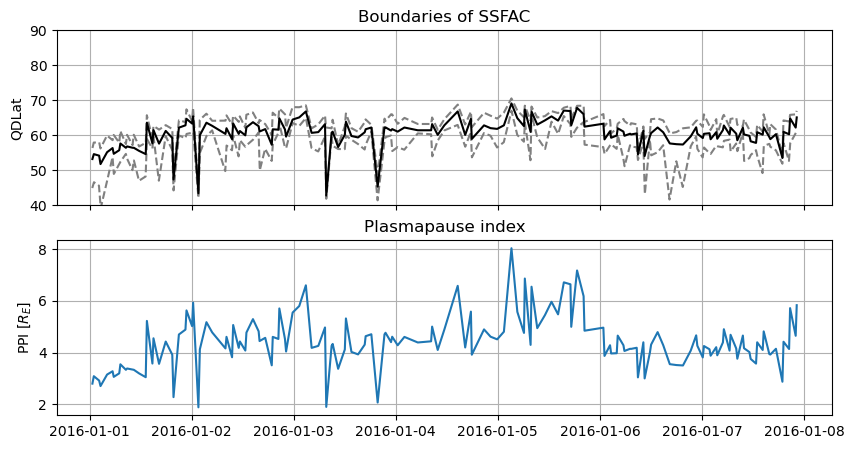

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5), sharex=True)
_equatorward = ds_id.where(ds_id["PointType"] == 0, drop=True)
_poleward = ds_id.where(ds_id["PointType"] == 1, drop=True)
axes[0].plot(_equatorward["Timestamp"], _equatorward["QDLat"], color="grey", linestyle="--")
axes[0].plot(_poleward["Timestamp"], _poleward["QDLat"], color="grey", linestyle="--")
axes[0].plot(ds["Timestamp"], ds["QDLat"], color="black", linestyle="-")
axes[1].plot(ds["Timestamp"], ds["PPI"])
axes[0].set_ylim(40, 90)
axes[0].set_title("Boundaries of SSFAC")
axes[0].set_ylabel("QDLat")
axes[1].set_title("Plasmapause index")
axes[1].set_ylabel("PPI [$R_E$]")
axes[0].grid()
axes[1].grid()